## Import libraries and Read in Data
2 files - Daily Stock price data, Sector mapping file

In [1]:
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
#ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
# A,1999-11-18,45.5,50.0,40.0,44.0,44739900.0,0.0,1.0,31.041951216877,34.112034304261,27.289627443409,30.018590187749,44739900.0
# A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415060499,29.336349501664,27.160001713052,27.548878904121,10897100.0

#price_df = pd.read_csv("/data/work/osa/2018-04-eigenportfolios/WIKI_PRICES.csv")
price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/WIKI_PRICES.10000.csv")
#price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/WIKI_PRICES.csv")
sectors_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/sectors.csv")
dates_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/dates2017_bob.csv")


In [2]:
price_df.columns
sectors_df.columns

Index([u'Ticker symbol', u'Security', u'SEC filings', u'GICS Sector',
       u'GICS Sub Industry', u'Address of Headquarters',
       u'Date first added[3][4]', u'CIK'],
      dtype='object')

In [3]:
price_df.ticker.unique()

array(['A', 'AA', 'AAL', 'AAMC', 'AAN'], dtype=object)

In [4]:
price_df[price_df.ticker == 'A'].iloc[38]

ticker                  A
date           2000-01-13
open                68.38
high                69.81
low                    66
close               67.63
volume             811400
ex-dividend             0
split_ratio             1
adj_open          46.6516
adj_high          47.6272
adj_low           45.0279
adj_close         46.1399
adj_volume         811400
Name: 38, dtype: object

## Keep data within date range

In [5]:
# Type conversion for date column.  Just adding a new column called dt
price_df['dt'] = pd.to_datetime(price_df.date, unit='ns') # 
print(price_df.dtypes)

# For now use data from 2017 up through present
price_df = price_df[price_df.dt > '2017-01-01']
price_df = price_df[price_df.dt < '2018-04-01']

ticker                 object
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dt             datetime64[ns]
dtype: object


In [6]:
# reshape pandas array .  Here lets just grab the closing value...
price_df = price_df.pivot(index='date', columns='ticker', values='close')

In [7]:
# use dummy data here if you want ..
# price_df = pd.read_csv("/data/mldl-101/labxx-eigenportfolios/dummydata.csv",index_col=0)
price_df

ticker,A,AA,AAL,AAMC
date,,,,
2017-01-03,46.49,28.83,46.300,53.0000
2017-01-04,47.10,30.26,46.700,55.9500
2017-01-05,46.54,30.65,45.890,58.0000
2017-01-06,47.99,30.68,46.210,59.0000
2017-01-09,48.14,29.48,47.080,59.9000
2017-01-10,48.10,30.98,48.480,59.9500
2017-01-11,49.25,31.97,48.640,64.1500
2017-01-12,48.52,33.04,48.100,63.8000
2017-01-13,48.69,33.01,47.650,69.1578


## Create daily return dataframe using pandas convenience function..

In [8]:
daily_return_df = price_df.pct_change()
# drop columns with 3 or more NaN
daily_return_df.dropna(axis=1, thresh=3, inplace=True)
#daily_return_df.dropna(axis=0, inplace=True)

In [9]:
# impute NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'mean')
imputer.fit(daily_return_df)
daily_return_df2 = imputer.transform(daily_return_df)
daily_return_df = pd.DataFrame(daily_return_df2,columns=daily_return_df.columns)

In [10]:
daily_return_df.head()

ticker,A,AA,AAL,AAMC
0,0.001256,0.001720,0.000481,0.001482
1,0.013121,0.049601,0.008639,0.055660
2,-0.011890,0.012888,-0.017345,0.036640
3,0.031156,0.000979,0.006973,0.017241
4,0.003126,-0.039113,0.018827,0.015254


## Plot some series

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

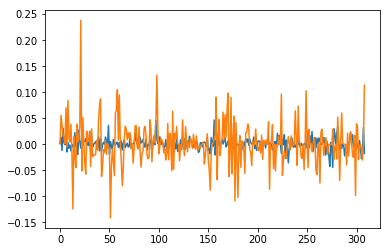

In [12]:
plt.figure()
daily_return_df.A.plot()
daily_return_df.AAMC.plot()
#daily_return_df.IBM.plot()

#daily_return_df.S1.plot()
#daily_return_df.S11.plot()
#daily_return_df.S2.plot()
#daily_return_df.S3.plot()


## Optional  : Save intermediate file and read back in .. Next time can start here

In [11]:
#daily_return_df.to_csv(path_or_buf='daily_return_2017.csv')
daily_return_df = pd.read_csv('daily_return_2017.csv')

In [12]:
#daily_return_df = daily_return_df.drop(columns=['Unnamed: 0','BCEI','EXXI','GDP','GLF','PCO','TDW','UPL'])
daily_return_df = daily_return_df.drop(columns=['Unnamed: 0'])
daily_return_df.head(15)
#daily_return_df.info()

,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
0,0.001256,0.001720,0.000481,0.001482,0.001429,0.001569,0.000563,-0.000966,0.001287,-0.000828,0.000663,0.001126,0.001411,0.000204,0.000729,0.002172,0.000284,-0.000581,0.003187,0.001469,-0.000294,0.006007,-0.000837,-0.000042,-0.002929,...,0.003497,0.001459,-0.000041,0.000202,0.000624,0.002742,-0.000531,-0.000895,0.000965,0.000564,0.001389,0.002416,0.000241,0.001621,0.002751,-0.000068,0.006523,0.000720,-0.000258,-0.000161,0.003426,0.001273,-0.001063,0.001435,0.000749
1,0.013121,0.049601,0.008639,0.055660,0.021003,0.017749,0.022489,0.008206,-0.001119,0.019517,0.011639,-0.003170,0.014100,0.024815,0.021739,-0.027616,0.024000,0.015686,0.030082,0.007939,0.110184,0.057308,0.027254,0.022727,0.019204,...,-0.027523,0.014904,0.005108,0.010477,0.031397,0.029820,0.011749,0.044313,0.003639,0.011019,-0.003493,0.049296,0.009194,0.009043,0.004519,0.047306,0.011765,0.014358,0.058501,0.008065,0.045527,0.015094,0.048978,0.009703,0.034091
2,-0.011890,0.012888,-0.017345,0.036640,-0.038686,-0.029775,-0.029326,-0.000698,0.005085,0.001823,-0.019175,-0.014964,0.007584,-0.011576,-0.010078,0.020927,-0.018750,-0.020994,-0.008035,0.008638,-0.008140,-0.007917,0.004987,-0.014815,-0.019740,...,-0.141509,-0.009129,-0.008112,-0.014689,0.005074,0.031952,-0.010323,-0.020509,0.003310,-0.029973,-0.018064,-0.020134,0.006425,-0.026198,0.004948,-0.010998,0.011628,-0.016210,-0.027634,-0.018000,-0.037418,-0.014870,0.037353,-0.003327,-0.094505
3,0.031156,0.000979,0.006973,0.017241,-0.014372,-0.017098,-0.012085,-0.013091,0.011148,-0.005232,-0.007820,0.017850,0.000314,0.013384,-0.002262,0.064422,-0.016720,-0.018733,0.005313,0.027204,0.030303,-0.019030,0.004764,-0.011278,-0.016934,...,-0.025604,-0.007010,0.004073,0.006431,-0.007824,-0.002661,-0.035202,-0.013718,0.012097,0.005618,0.007688,0.013699,0.000095,0.014277,0.005819,-0.046465,-0.019157,0.006498,0.024867,-0.002037,-0.018641,0.026415,0.008219,0.003152,-0.036408
4,0.003126,-0.039113,0.018827,0.015254,0.012638,-0.008029,0.003058,-0.000590,0.009160,-0.014635,0.004926,0.026493,0.006584,0.008019,-0.027211,-0.030261,0.008097,-0.010048,0.014642,-0.000981,0.001532,-0.076345,-0.010865,-0.030418,0.003724,...,-0.023119,-0.004236,-0.014116,-0.014813,0.021114,0.002668,-0.033784,-0.024890,0.002794,-0.005587,0.006812,-0.020270,0.019436,0.000116,0.032043,0.022907,-0.003906,-0.010837,-0.003466,0.006122,-0.010656,-0.022059,-0.081522,-0.002773,0.005038
5,-0.000831,0.050882,0.029737,0.000835,0.038080,0.028327,0.018293,0.002300,0.001008,0.001857,0.022549,-0.116867,-0.002180,-0.007604,0.018648,0.001418,0.019277,0.004060,-0.041585,0.013500,-0.037320,-0.045393,-0.010186,0.019608,-0.006030,...,-0.007273,-0.004659,-0.005392,0.010318,0.006477,0.023222,0.015385,-0.012763,0.005882,0.002809,-0.008119,-0.013793,0.062336,-0.006165,-0.011212,0.115635,0.000000,0.015385,0.013913,0.006085,-0.046827,-0.022556,-0.000845,-0.000371,0.012531
6,0.023909,0.031956,0.003300,0.070058,0.001850,-0.006559,0.010479,0.020657,0.005373,-0.003706,0.019175,0.033546,-0.045731,-0.038901,0.019451,0.024079,-0.002364,0.016174,-0.008642,-0.005086,-0.050842,-0.014194,-0.007869,-0.015385,-0.006533,...,0.018723,0.005291,0.016464,0.004377,0.007426,0.006856,0.023416,0.002281,-0.007541,0.025210,-0.015553,-0.027972,0.009501,-0.005267,0.024422,-0.002920,-0.070588,0.008264,-0.072041,0.004032,0.005650,0.011538,-0.024958,-0.011496,-0.022277
7,-0.014822,0.033469,-0.011102,-0.005456,-0.002769,0.314261,-0.034074,0.005997,-0.004175,0.002558,-0.024459,-0.014735,0.002290,0.028578,-0.029181,0.161826,0.005529,-0.010943,0.009886,-0.008763,0.063944,-0.017279,0.001627,-0.023438,-0.031000,...,-0.041096,-0.022267,-0.000968,-0.025276,-0.000246,-0.011270,-0.039031,0.031866,0.002636,-0.016393,0.023559,-0.014388,-0.002789,-0.014472,0.021711,-0.040264,-0.029536,-0.021630,0.077634,-0

In [13]:
daily_return_df.describe()

,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.001256,0.001720,0.000481,0.001482,0.001429,0.001569,0.000563,-0.000966,0.001287,-0.000828,0.000663,0.001126,0.001411,0.000204,0.000729,0.002172,0.000284,-0.000581,0.003187,0.001469,-0.000294,0.006007,-0.000837,-0.000042,-0.002929,...,0.003497,0.001459,-0.000041,0.000202,0.000624,0.002742,-0.000531,-0.000895,0.000965,0.000564,0.001389,0.002416,0.000241,0.001621,0.002751,-0.000068,0.006523,0.000720,-0.000258,-0.000161,0.003426,0.001273,-0.001063,0.001435,0.000749
std,0.011706,0.023649,0.018605,0.039785,0.023814,0.051647,0.016699,0.024720,0.012453,0.010814,0.021227,0.023591,0.017046,0.017172,0.016325,0.014697,0.018470,0.015861,0.016996,0.010310,0.030521,0.024779,0.011081,0.020855,0.032603,...,0.047991,0.011155,0.011558,0.006136,0.027706,0.008439,0.018756,0.034187,0.009618,0.029107,0.019827,0.036170,0.012858,0.017674,0.023222,0.032448,0.103678,0.015109,0.038284,0.021625,0.009728,0.019467,0.028780,0.010832,0.032509
min,-0.044226,-0.077496,-0.060045,-0.141497,-0.104662,-0.340749,-0.071221,-0.203439,-0.044165,-0.038294,-0.078882,-0.116867,-0.127612,-0.104744,-0.059662,-0.033298,-0.058099,-0.127314,-0.076032,-0.047982,-0.200417,-0.076345,-0.036575,-0.070485,-0.293641,...,-0.141509,-0.042030,-0.038360,-0.038016,-0.183573,-0.030336,-0.067105,-0.219234,-0.047797,-0.199307,-0.090549,-0.224194,-0.057613,-0.055963,-0.087641,-0.105749,-0.137652,-0.061274,-0.081967,-0.108926,-0.046827,-0.056911,-0.124691,-0.042974,-0.123810
25%,-0.005288,-0.010766,-0.009461,-0.018967,-0.008703,-0.022870,-0.008331,-0.011318,-0.004318,-0.007210,-0.010300,-0.008337,-0.004659,-0.006790,-0.009043,-0.001858,-0.009606,-0.006123,-0.006548,-0.003892,-0.014761,0.006007,-0.007035,-0.012312,-0.013444,...,-0.022975,-0.004423,-0.006355,0.000202,-0.008764,0.002742,-0.011582,-0.016587,-0.003336,-0.010557,-0.008967,-0.014388,-0.005587,-0.006406,-0.009054,-0.017396,-0.017194,-0.008289,-0.023239,-0.010369,0.003426,-0.010410,-0.015211,-0.003544,-0.018106
50%,0.001156,0.002000,0.000481,0.000000,0.001357,-0.001078,0.001343,-0.001010,0.000435,-0.000781,-0.000381,0.000771,0.001387,0.000521,0.000365,0.002172,0.001213,0.000000,0.002164,0.000646,0.001614,0.006007,0.000838,0.000000,-0.001584,...,0.000000,0.001229,0.000183,0.000202,0.000395,0.002742,-0.000531,-0.001015,0.000717,0.000564,0.001904,0.000000,0.000730,0.001075,0.002178,-0.000259,0.000000,0.000487,-0.003481,0.000000,0.003426,0.000000,-0.001351,0.001717,0.000000
75%,0.006516,0.014417,0.011599,0.016950,0.011216,0.021726,0.009278,0.008789,0.006406,0.005895,0.011330,0.009690,0.007591,0.008945,0.009538,0.002172,0.010951,0.006554,0.011166,0.007143,0.015012,0.006007,0.005445,0.008949,0.011007,...,0.023434,0.008396,0.005171,0.000202,0.010356,0.002742,0.010736,0.018107,0.005082,0.010873,0.011525,0.018190,0.006711,0.008366,0.013832,0.019227,0.016649,0.010312,0.018284,0.009499,0.003426,0.013245,0.012983,0.006550,0.018462
max,0.046480,0.098294,0.058244,0.238297,0.170359,0.314261,0.081119,0.163345,0.060981,0.031713,0.153846,0.174891,0.137673,0.093013,0.067172,0.161826,0.063862,0.056688,0.091799,0.042040,0.124238,0.417112,0.029809,0.161435,0.086229,...,0.247475,0.045302,0.051505,0.046186,0.276697,0.102077,0.095640,0.118891,0.065133,0.130919,0.092965,0.200637,

# Extra stats to find columns with largest std
These columns should be scrutinized to ensure the values make sense
They may be candidates for cleaning

In [50]:
desc = daily_return_df.describe()
rownames = desc.index.tolist()

In [51]:
desc.head(10)

,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.001256,0.001720,0.000481,0.001482,0.001429,0.001569,0.000563,-0.000966,0.001287,-0.000828,0.000663,0.001126,0.001411,0.000204,0.000729,0.002172,0.000284,-0.000581,0.003187,0.001469,-0.000294,0.006007,-0.000837,-0.000042,-0.002929,...,0.003497,0.001459,-0.000041,0.000202,0.000624,0.002742,-0.000531,-0.000895,0.000965,0.000564,0.001389,0.002416,0.000241,0.001621,0.002751,-0.000068,0.006523,0.000720,-0.000258,-0.000161,0.003426,0.001273,-0.001063,0.001435,0.000749
std,0.011706,0.023649,0.018605,0.039785,0.023814,0.051647,0.016699,0.024720,0.012453,0.010814,0.021227,0.023591,0.017046,0.017172,0.016325,0.014697,0.018470,0.015861,0.016996,0.010310,0.030521,0.024779,0.011081,0.020855,0.032603,...,0.047991,0.011155,0.011558,0.006136,0.027706,0.008439,0.018756,0.034187,0.009618,0.029107,0.019827,0.036170,0.012858,0.017674,0.023222,0.032448,0.103678,0.015109,0.038284,0.021625,0.009728,0.019467,0.028780,0.010832,0.032509
min,-0.044226,-0.077496,-0.060045,-0.141497,-0.104662,-0.340749,-0.071221,-0.203439,-0.044165,-0.038294,-0.078882,-0.116867,-0.127612,-0.104744,-0.059662,-0.033298,-0.058099,-0.127314,-0.076032,-0.047982,-0.200417,-0.076345,-0.036575,-0.070485,-0.293641,...,-0.141509,-0.042030,-0.038360,-0.038016,-0.183573,-0.030336,-0.067105,-0.219234,-0.047797,-0.199307,-0.090549,-0.224194,-0.057613,-0.055963,-0.087641,-0.105749,-0.137652,-0.061274,-0.081967,-0.108926,-0.046827,-0.056911,-0.124691,-0.042974,-0.123810
25%,-0.005288,-0.010766,-0.009461,-0.018967,-0.008703,-0.022870,-0.008331,-0.011318,-0.004318,-0.007210,-0.010300,-0.008337,-0.004659,-0.006790,-0.009043,-0.001858,-0.009606,-0.006123,-0.006548,-0.003892,-0.014761,0.006007,-0.007035,-0.012312,-0.013444,...,-0.022975,-0.004423,-0.006355,0.000202,-0.008764,0.002742,-0.011582,-0.016587,-0.003336,-0.010557,-0.008967,-0.014388,-0.005587,-0.006406,-0.009054,-0.017396,-0.017194,-0.008289,-0.023239,-0.010369,0.003426,-0.010410,-0.015211,-0.003544,-0.018106
50%,0.001156,0.002000,0.000481,0.000000,0.001357,-0.001078,0.001343,-0.001010,0.000435,-0.000781,-0.000381,0.000771,0.001387,0.000521,0.000365,0.002172,0.001213,0.000000,0.002164,0.000646,0.001614,0.006007,0.000838,0.000000,-0.001584,...,0.000000,0.001229,0.000183,0.000202,0.000395,0.002742,-0.000531,-0.001015,0.000717,0.000564,0.001904,0.000000,0.000730,0.001075,0.002178,-0.000259,0.000000,0.000487,-0.003481,0.000000,0.003426,0.000000,-0.001351,0.001717,0.000000
75%,0.006516,0.014417,0.011599,0.016950,0.011216,0.021726,0.009278,0.008789,0.006406,0.005895,0.011330,0.009690,0.007591,0.008945,0.009538,0.002172,0.010951,0.006554,0.011166,0.007143,0.015012,0.006007,0.005445,0.008949,0.011007,...,0.023434,0.008396,0.005171,0.000202,0.010356,0.002742,0.010736,0.018107,0.005082,0.010873,0.011525,0.018190,0.006711,0.008366,0.013832,0.019227,0.016649,0.010312,0.018284,0.009499,0.003426,0.013245,0.012983,0.006550,0.018462
max,0.046480,0.098294,0.058244,0.238297,0.170359,0.314261,0.081119,0.163345,0.060981,0.031713,0.153846,0.174891,0.137673,0.093013,0.067172,0.161826,0.063862,0.056688,0.091799,0.042040,0.124238,0.417112,0.029809,0.161435,0.086229,...,0.247475,0.045302,0.051505,0.046186,0.276697,0.102077,0.095640,0.118891,0.065133,0.130919,0.092965,0.200637,

compute new row that contains the number of std's in max for each column

In [52]:
#df4 = desc.loc[['max']].apply(np.max,axis=0) / desc.loc[['std']].apply(np.max,axis=0)
#list  = df4.tolist()
#cols = desc.columns

#desc.loc[['std']].apply(np.max,axis=0)

In [53]:
#row = pd.Series(list,cols)
#desc = desc.append([row],ignore_index=True)
#rownames.append('numStd')
#desc.index.rename(rownames)
#desc.rename({0: 'count', 1: 'mean', 2: 'std', 3:'min', 4:'25%', 5:'50%', 6:'75%', 7:'max', 8:'numStd'}, axis='index')


In [54]:
# desc.loc[['mean','std','min','max'],['A','AA']]
colidx = desc.loc[['std']].apply(np.max,axis=0) > 1
desc.loc[['mean','std','min','max'], colidx]

,BCEI,EXXI,GDP,GLF,PCO,TDW,UPL
mean,0.247166,0.840709,0.381112,0.144310,0.390608,0.081340,0.137994
std,4.352416,14.141419,5.837550,1.183025,5.318823,1.470957,2.147944
min,-0.352647,-0.342515,-0.115556,-0.415888,-0.122164,-0.208068,-0.133929
max,76.623762,249.000000,102.803997,20.626452,93.691535,25.881720,37.821268


In [146]:
daily_return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Columns: 2683 entries, A to ZUMZ
dtypes: float64(2683)
memory usage: 6.3 MB


## Start some data analysis here !

In [113]:
daily_return_df.corr().head(20)


,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
A,1.000000,0.215260,0.339682,0.052667,0.173879,0.020891,0.264587,0.064002,0.394012,0.108424,0.277424,0.314303,0.348956,0.228827,0.300990,0.043860,0.214600,0.292589,0.391425,0.515677,0.253976,0.120611,0.189187,0.256799,0.079850,...,0.172387,0.473766,0.311306,0.176752,0.249888,0.069369,0.174547,0.313971,0.389276,0.068604,0.216621,0.180353,0.379906,0.272697,0.341835,0.153703,0.098693,0.367331,0.197750,0.141031,0.055993,0.281867,0.010016,0.531685,-0.015409
AA,0.215260,1.000000,0.245272,0.122454,0.054888,0.072106,0.227628,0.019382,0.259507,0.100674,0.275807,0.083051,0.099182,0.118050,0.267384,0.082191,0.167178,0.184165,0.146599,0.175900,0.167394,-0.062099,-0.026229,0.210823,0.212496,...,0.036345,0.232480,0.170864,0.127661,0.178070,0.197300,0.078649,0.232577,0.155071,0.116325,0.267374,0.099279,0.225460,0.250604,0.107137,0.393340,0.029878,0.275150,0.148220,0.040042,0.014358,0.142817,0.160038,0.111000,0.097438
AAL,0.339682,0.245272,1.000000,0.048984,0.181987,0.051207,0.270849,0.120725,0.299073,0.162420,0.337345,0.081084,0.164302,0.228632,0.329135,0.026591,0.201202,0.272552,0.122101,0.260634,0.135845,0.012601,0.046174,0.241421,0.093453,...,0.167346,0.233468,0.257299,0.163981,0.138029,0.186295,0.142509,0.241724,0.242582,0.018267,0.118238,0.060318,0.236719,0.276885,0.226545,0.182374,0.052910,0.392110,0.153155,0.145786,0.041273,0.180735,0.151792,0.228059,0.124663
AAMC,0.052667,0.122454,0.048984,1.000000,-0.026549,0.036842,0.030750,-0.031896,0.050498,0.038747,0.073278,-0.052962,-0.060046,-0.009138,0.023611,0.101332,0.061206,0.045951,-0.019393,0.020033,0.044262,-0.056769,0.070709,-0.069740,0.037940,...,-0.026050,0.010547,-0.037586,-0.077009,-0.027375,-0.002550,0.095163,0.004834,0.104782,0.024088,0.092927,0.019232,0.057932,0.034109,0.020708,-0.004111,-0.068600,-0.046506,0.060715,0.116379,-0.021148,0.075349,-0.018342,0.055652,0.025811
AAN,0.173879,0.054888,0.181987,-0.026549,1.000000,0.028359,0.179535,0.148574,0.075268,0.081028,0.220081,-0.024929,0.140476,0.140793,0.198472,0.090249,0.224823,0.272680,0.166638,0.150434,0.117953,0.025079,0.036964,0.228903,0.105348,...,0.243110,0.145025,0.210502,0.071916,0.107784,0.043751,0.090366,0.175921,0.138872,0.080488,0.114191,0.050400,0.194039,0.166704,0.116090,0.265138,0.039400,0.197697,0.106371,0.084228,-0.001003,0.089078,0.085366,0.179739,0.167386
AAOI,0.020891,0.072106,0.051207,0.036842,0.028359,1.000000,-0.039097,0.040817,0.149347,-0.016926,-0.102596,-0.012355,0.050675,0.100626,-0.012139,0.277445,0.032616,0.122045,0.114457,0.006055,0.038619,-0.030139,0.018797,0.074061,-0.017308,...,-0.117921,0.016956,-0.027439,-0.055833,-0.146489,0.039055,-0.004395,-0.028629,0.017750,0.025107,0.236207,0.032470,0.132348,0.049016,0.044274,0.075389,0.022688,0.003931,0.048675,0.115015,0.062836,0.218383,-0.143527,0.052888,0.096926
AAON,0.264587,0.227628,0.270849,0.030750,0.179535,-0.039097,1.000000,0.168476,0.191218,0.126722,0.282016,0.158813,0.087821,0.105146,0.436665,-0.100098,0.306529,0.337696,0.199319,0.250670,0.139698,0.090947,0.013456,0.341926,0.182996,...,0.079116,0.428626,0.242039,0.212531,0.255187,0.188208,0.326937,0.336153,0.180609,0.075396,0.103862,0.167856,0.275454,0.209960,0.162195,0.209530,0.002074,0.384349,0.095180,0.119693,0.097359,0.068327,0.152773,0.139258,0.172666
AAP,0.064002,0.019382,0.120725,-0.031896,0.148574,0.040817,0.168476,1.000000,-0.007782,0.105616,0.038542,0.130417,0.096625,0.107305,0.216924,-0.011794,0.308330,0.174212,0.054375,0.140773,0.009633,-0.005404,0.095925,0.135984,0.113363,...,0.099158,0.126081,0.208952,0.019798,0.083069,-0.034835,0.171561,0.188592,0.132548,-0.068208,-0.006698,0.061243,0.098562,0.008684,0.018524,0.087459,-0.012609,0.262294,0.031092,0.011467,0.002122,0.002041,0.260424,0.123931,0.242937
AAPL,0.394012,0.259507,0.299073,0.050498,0.075268,0.149347

In [114]:
num_symbols = len(daily_return_df.columns)
num_symbols

2676

# PCA
compute principal components = select number you want to keep with variable below called n_components
there are two operations - 
fit computes the eigenvalues, and percent variance explained
transform creates the matrix of eignvectors

In [125]:
## PCA
n_components = 11
from sklearn.decomposition import PCA
pca = PCA(n_components = n_components)
dr_pca_df = pca.fit_transform(daily_return_df)

In [126]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_


array([0.10242, 0.08345, 0.06722, 0.05257, 0.04801, 0.04727, 0.03851,
       0.03552, 0.03167, 0.03038, 0.02966])

Create dataframe with the eigenvalues as columns
give each eigenvector a name like P0, P1 etc

In [127]:
Col_headings = ['P'+str(x) for x in range(n_components)]
pcomps = pd.DataFrame(dr_pca_df) 
pcomps.columns = Col_headings
# concatenate the Churn column on the end so its easy to plot by Churn
# if 'Churn' not in pcomps.columns:
#    pcomps = pd.concat([pcomps, label], axis=1)
pcomps.head()


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,4.110387e-15,1.199776e-15,1.138792e-15,-4.903385e-16,-2.614740e-16,-3.826855e-17,-1.145363e-17,1.108552e-17,-4.403930e-17,-8.368742e-17,1.600054e-17
1,5.782662e-03,-7.447307e-03,3.103776e-02,-2.525367e-02,-8.746984e-02,1.350871e-02,7.563435e-02,1.402845e-01,1.439365e-04,4.491792e-02,5.487979e-02
2,-8.407989e-02,-2.270268e-02,-5.956353e-02,1.685524e-02,-4.177113e-02,5.954975e-02,-6.778404e-02,-1.229279e-01,-1.087965e-02,-1.170841e-01,-1.291344e-01
3,-6.951328e-02,-3.291525e-02,-8.532029e-02,1.760962e-03,-1.693957e-03,-6.896909e-02,3.203370e-02,2.486565e-02,-4.588838e-02,-9.847015e-02,-5.372738e-02
4,-1.864527e-01,-9.072067e-02,-1.086493e-01,-3.653228e-01,9.558291e+00,6.222707e+00,5.960818e-02,-2.138522e-01,1.534584e-01,1.646371e-01,-1.730509e-02


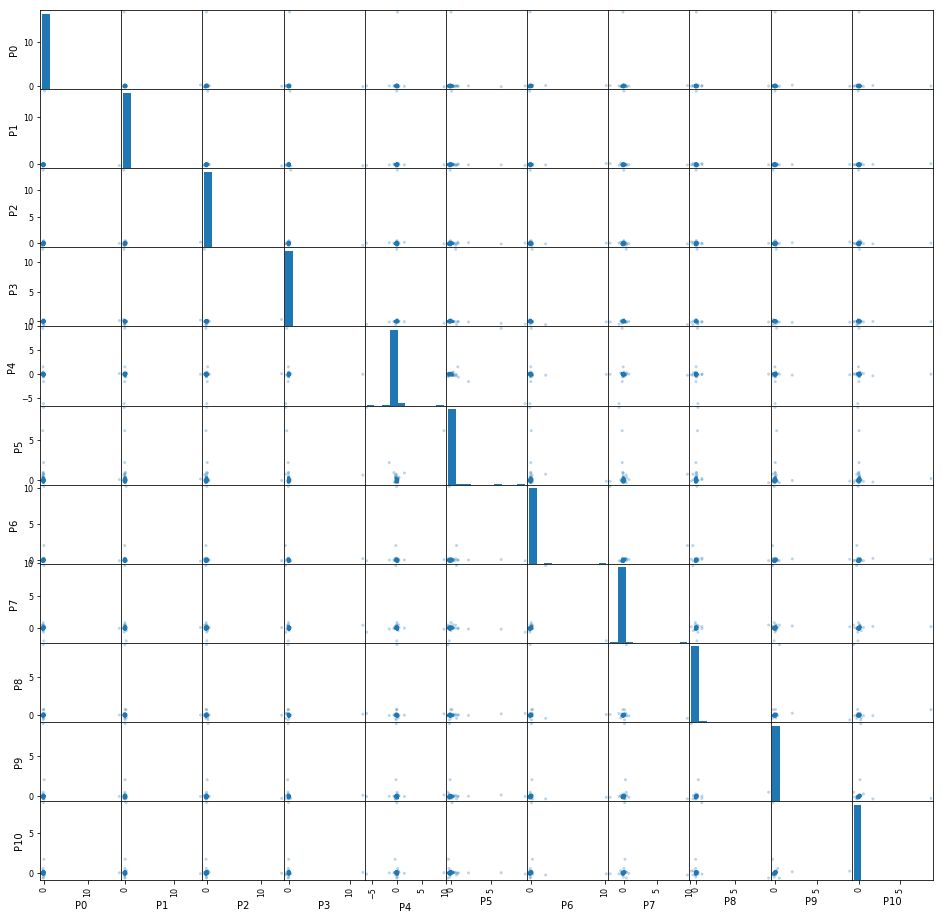

In [128]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# make a scatter plot
# pd.plotting.scatter_matrix(pcomps[pcomps['P0'] <1], alpha =.3,  figsize=[16,16])
pd.plotting.scatter_matrix(pcomps, alpha =.3,  figsize=[16,16])
#scatter_matrix(pcomps[attributes], alpha =.3, marker='x',c=churn_cat_encode_new2.InternetService0.astype('int').apply(lambda x:churn_colors[x]), figsize=[16,16])

plt.show()

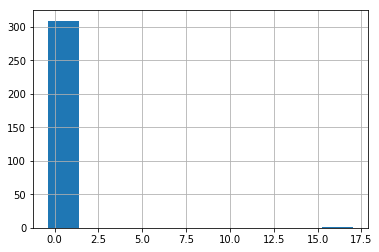

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
#pcomps.P0[pcomps['P0'] <1].hist()
#pcomps.P0[pcomps['P0'] >1]
pcomps.P0.hist()

# Something caused these values of the eigenvector at a given date to be way out of range

using the full return_daily_2017 including the bad columns 
the following code detailed how we discovered they were problematic
since then - I did a trick up near the top to look at the stats more carefully
and find the columns with std > 2
removing those columns causes the scatterplot to begin to behave better
there are still some columns with higher than normal daily returns and we need to 
scrutenize these to see if there are just microcap stocks with a huge breakout (legitimate)
versus a glitch in quandl
lets explore the data where the this happens

In [130]:
print pcomps[(pcomps['P0'] >1  ) | (pcomps['P1'] >1) | (pcomps['P2'] >1) | (pcomps['P3'] >1) | (pcomps['P4'] >1) ]
#daily_return_df.iloc[38]
#price_df[price_df.ticker == 'A'].iloc[68]

            P0         P1         P2         P3        P4        P5        P6  \
4    -0.186453  -0.090721  -0.108649  -0.365323  9.558291  6.222707  0.059608   
63   -0.187498  -0.260733  -0.369331  12.171389 -0.012854  0.597255  0.181972   
107   0.208414  15.352065   0.216237   0.173854 -0.030184  0.097450 -0.161983   
112  -0.094932  -0.312890  13.731007   0.289840  0.089341 -0.090834 -0.090400   
116  17.008424  -0.246071  -0.012611   0.097407  0.122439  0.023081 -0.107665   
233  -0.113191  -0.070054   0.210412  -0.100114  1.518797  0.865490 -0.000441   

           P7        P8        P9       P10  
4   -0.213852  0.153458  0.164637 -0.017305  
63   0.401813  0.097954  0.130793  0.022831  
107  0.052375  0.003364 -0.020031 -0.138905  
112  0.032319 -0.033515 -0.257743 -0.086739  
116 -0.085698 -0.000641 -0.019536 -0.028526  
233 -0.057088 -0.027420 -0.039960 -0.094576  


In [131]:
daily_return_df.iloc[[38,68,70,82,233]]

,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
38,-0.006969,-0.005463,0.000864,-0.011252,-0.002195,-0.032448,-0.014641,-0.002103,0.000438,-0.007444,-0.010444,-0.024462,-0.006107,-0.002398,-0.013279,-0.033298,-0.026886,-0.019000,0.000254,-0.008359,-0.043664,0.000541,-0.004675,-0.035971,-0.004543,...,-0.004149,-0.016956,-0.002240,-0.013521,-0.010860,-0.001094,-0.009629,-0.016845,-0.003053,-0.039578,-0.028898,-0.062016,0.001026,-0.018184,-0.022613,0.001657,-0.023585,-0.004655,-0.006260,-0.045714,-0.002163,-0.014870,-0.040171,-0.009660,0.012407
68,0.002086,0.021687,0.038043,0.008696,0.011792,-0.046784,0.024709,0.004341,-0.010756,0.011655,-0.002688,0.008015,-0.012159,-0.006445,0.005599,0.002105,0.013559,0.010989,0.005673,-0.000229,-0.005141,0.006007,0.004398,0.003690,0.013852,...,0.015038,-0.001380,0.004504,0.000202,0.019243,-0.008896,0.026201,-0.022748,0.000312,-0.007595,-0.000290,0.014388,-0.003749,-0.002171,0.016733,0.060118,-0.014151,0.000244,0.027314,0.013861,-0.000177,0.000000,0.004014,0.002086,0.017544
70,-0.004186,-0.033073,-0.013876,0.012087,-0.011378,0.109750,-0.010204,-0.005997,-0.005289,-0.004089,-0.024434,-0.011477,-0.003728,-0.001728,-0.018182,-0.006363,-0.025402,-0.011307,-0.006933,-0.018629,0.011786,0.006007,-0.003943,-0.003704,-0.009402,...,0.015267,-0.010126,-0.014241,0.000202,-0.004042,0.001495,-0.007194,-0.027184,-0.003748,-0.007732,0.004352,0.007519,0.003021,-0.015556,0.009674,-0.014698,-0.004831,-0.018413,-0.014785,0.000000,-0.000532,-0.003597,-0.008711,-0.002255,-0.020290
82,0.013624,-0.013341,-0.012670,-0.015689,0.022259,0.014983,0.021828,-0.011327,0.020536,0.008872,-0.001724,0.017988,0.008189,0.005363,0.005308,-0.005871,0.007353,0.004631,0.024939,-0.003666,0.002330,0.006007,0.002110,-0.003509,0.001893,...,-0.014286,-0.001751,0.002816,0.000202,0.008755,0.008297,0.013333,0.025328,0.000000,0.004808,0.023590,-0.007042,0.009779,0.006153,0.012870,0.019956,0.045455,0.012241,0.008523,0.031308,0.003426,-0.006920,0.003324,0.003030,-0.002786
233,-0.006190,-0.014597,-0.009213,0.000685,-0.003718,-0.036095,0.002670,-0.027591,-0.000942,-0.019980,-0.019828,-0.008421,0.001995,-0.017502,-0.015968,0.002172,-0.009608,-0.023177,-0.008493,0.001462,0.035615,0.006007,0.002807,-0.015038,-0.042781,...,0.030303,-0.013523,-0.011350,0.000202,-0.003484,0.002742,-0.030556,-0.004626,-0.002521,-0.011236,0.008502,0.000000,0.005835,-0.019633,0.013690,-0.020962,0.009413,-0.016622,-0.027523,-0.009368,0.003426,-0.007895,0.010546,-0.002394,-0.032787


# Quandl data must have glitch 
rows 38,68,70,82,233 of 'daily_return_2017.csv'
at Stock symbols EXXI, GDP, UPL, BCEI, PCO
have anreasonably large percentage changes at the given rows

In [132]:
print pcomps.P1.idxmax()
dates_df.iloc[[38,68,70,82,233]]

107


,Date
38,2/28/2017
68,4/11/2017
70,4/13/2017
82,5/2/2017
233,12/5/2017


In [133]:
daily_return_df.iloc[[38,68,70,82,233]].idxmax(axis=1)

38      LXU
68     NADL
70     AMRS
82      WAC
233     CUR
dtype: object

In [134]:
daily_return_df.iloc[[38,68,70,82,233]]


,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,ACET,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
38,-0.006969,-0.005463,0.000864,-0.011252,-0.002195,-0.032448,-0.014641,-0.002103,0.000438,-0.007444,-0.010444,-0.024462,-0.006107,-0.002398,-0.013279,-0.033298,-0.026886,-0.019000,0.000254,-0.008359,-0.043664,0.000541,-0.004675,-0.035971,-0.004543,...,-0.004149,-0.016956,-0.002240,-0.013521,-0.010860,-0.001094,-0.009629,-0.016845,-0.003053,-0.039578,-0.028898,-0.062016,0.001026,-0.018184,-0.022613,0.001657,-0.023585,-0.004655,-0.006260,-0.045714,-0.002163,-0.014870,-0.040171,-0.009660,0.012407
68,0.002086,0.021687,0.038043,0.008696,0.011792,-0.046784,0.024709,0.004341,-0.010756,0.011655,-0.002688,0.008015,-0.012159,-0.006445,0.005599,0.002105,0.013559,0.010989,0.005673,-0.000229,-0.005141,0.006007,0.004398,0.003690,0.013852,...,0.015038,-0.001380,0.004504,0.000202,0.019243,-0.008896,0.026201,-0.022748,0.000312,-0.007595,-0.000290,0.014388,-0.003749,-0.002171,0.016733,0.060118,-0.014151,0.000244,0.027314,0.013861,-0.000177,0.000000,0.004014,0.002086,0.017544
70,-0.004186,-0.033073,-0.013876,0.012087,-0.011378,0.109750,-0.010204,-0.005997,-0.005289,-0.004089,-0.024434,-0.011477,-0.003728,-0.001728,-0.018182,-0.006363,-0.025402,-0.011307,-0.006933,-0.018629,0.011786,0.006007,-0.003943,-0.003704,-0.009402,...,0.015267,-0.010126,-0.014241,0.000202,-0.004042,0.001495,-0.007194,-0.027184,-0.003748,-0.007732,0.004352,0.007519,0.003021,-0.015556,0.009674,-0.014698,-0.004831,-0.018413,-0.014785,0.000000,-0.000532,-0.003597,-0.008711,-0.002255,-0.020290
82,0.013624,-0.013341,-0.012670,-0.015689,0.022259,0.014983,0.021828,-0.011327,0.020536,0.008872,-0.001724,0.017988,0.008189,0.005363,0.005308,-0.005871,0.007353,0.004631,0.024939,-0.003666,0.002330,0.006007,0.002110,-0.003509,0.001893,...,-0.014286,-0.001751,0.002816,0.000202,0.008755,0.008297,0.013333,0.025328,0.000000,0.004808,0.023590,-0.007042,0.009779,0.006153,0.012870,0.019956,0.045455,0.012241,0.008523,0.031308,0.003426,-0.006920,0.003324,0.003030,-0.002786
233,-0.006190,-0.014597,-0.009213,0.000685,-0.003718,-0.036095,0.002670,-0.027591,-0.000942,-0.019980,-0.019828,-0.008421,0.001995,-0.017502,-0.015968,0.002172,-0.009608,-0.023177,-0.008493,0.001462,0.035615,0.006007,0.002807,-0.015038,-0.042781,...,0.030303,-0.013523,-0.011350,0.000202,-0.003484,0.002742,-0.030556,-0.004626,-0.002521,-0.011236,0.008502,0.000000,0.005835,-0.019633,0.013690,-0.020962,0.009413,-0.016622,-0.027523,-0.009368,0.003426,-0.007895,0.010546,-0.002394,-0.032787
